In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


<AxesSubplot:xlabel='year'>

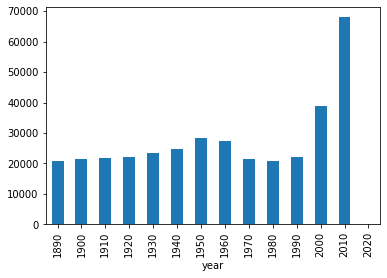

In [4]:
# Using groupby(), plot the number of films
# that have been released each decade in the history of cinema.

t = titles
t.groupby(t.year.mod(10)).size().plot(kind='bar')
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

<AxesSubplot:xlabel='year'>

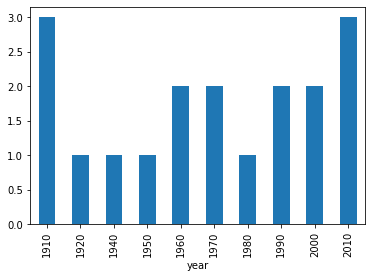

In [5]:
# Use groupby() to plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

In [6]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      626
      actress    281
1951  actor      647
      actress    281
1952  actor      607
      actress    293
1953  actor      652
      actress    301
1954  actor      634
      actress    310
1955  actor      641
      actress    281
1956  actor      643
      actress    305
1957  actor      735
      actress    301
1958  actor      710
      actress    295
1959  actor      721
      actress    317
dtype: int64

In [ ]:
# In the 1950s decade taken as a whole,
# how many total roles were available to actors,
# and how many to actresses, for each "n" number 1 through 5?

c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

In [7]:
# Use groupby() to determine how many roles are listed
# for each of the Pink Panther movies.

c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort_values('n').groupby(['year'])[['n']].max()
c

,n
year,
1963,15.0
2006,50.0


In [8]:
# List, in order by year, each of the films
# in which Frank Oz has played more than 1 role.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

In [ ]:
# List each of the characters that Frank Oz
# has portrayed at least twice.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].sort_values()